<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [3]:
URL1 = "data/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'data/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [6]:
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
# Seleccionamos la columna Class como Pandas Series (un solo corchete)
Y_series = data['Class']

# Convertimos a NumPy array
Y = Y_series.to_numpy()

# Opcional: verificar
print(Y[:5])


[0 0 0 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


In [9]:
# Dividimos X e Y en datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Opcional: verificar tamaños
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (72, 80)
X_test: (18, 80)
Y_train: (72,)
Y_test: (18,)


we can see we only have 18 test samples.


In [10]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()
# Creamos GridSearchCV con 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Ajustamos a los datos de entrenamiento
logreg_cv.fit(X_train, Y_train)

# Ver el mejor parámetro
print("Mejores parámetros:", logreg_cv.best_params_)

Mejores parámetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [12]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [13]:
# Calculamos la precisión en los datos de prueba
test_accuracy = logreg_cv.best_estimator_.score(X_test, Y_test)

print("Accuracy en test data:", test_accuracy)

Accuracy en test data: 0.8333333333333334


Lets look at the confusion matrix:


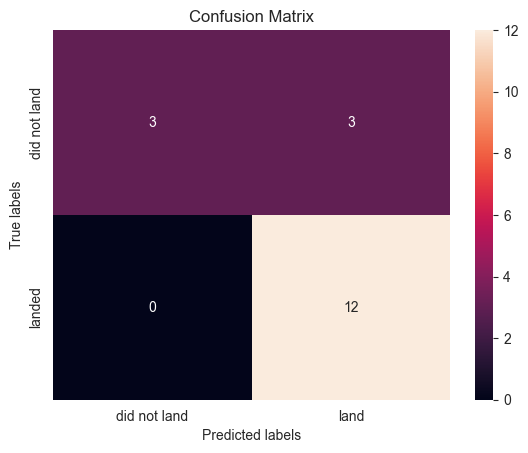

In [16]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [18]:
# Creamos el objeto SVM
svm = SVC()

# Creamos GridSearchCV con 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Ajustamos el modelo a los datos de entrenamiento
svm_cv.fit(X_train, Y_train)

,estimator,SVC()
,param_grid,"{'C': array([1.0000...00000000e+03]), 'gamma': array([1.0000...00000000e+03]), 'kernel': ('linear', ...)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
# Calculamos la precisión en el conjunto de prueba
svm_test_accuracy = svm_cv.best_estimator_.score(X_test, Y_test)

We can plot the confusion matrix


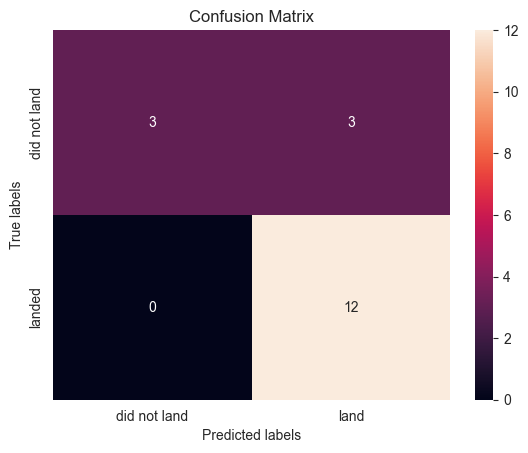

In [21]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [22]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [23]:
# Creamos GridSearchCV con 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustamos el modelo a los datos de entrenamiento
tree_cv.fit(X_train, Y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...], 'max_features': ['sqrt', None], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8714285714285713


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [25]:
# Precisión en el conjunto de test
test_accuracy_tree = tree_cv.score(X_test, Y_test)
print("Accuracy en test:", test_accuracy_tree)

Accuracy en test: 0.8333333333333334


We can plot the confusion matrix


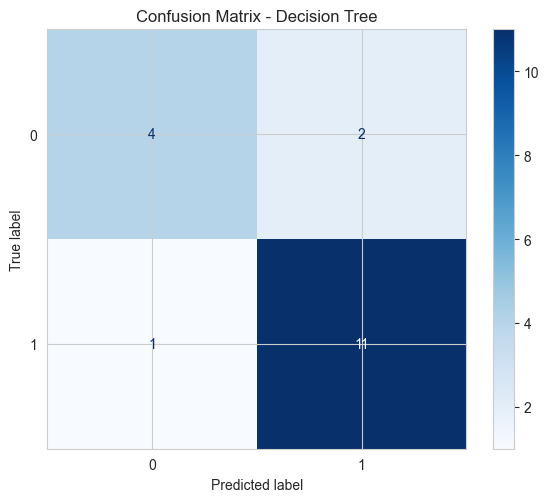

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones
yhat = tree_cv.predict(X_test)

# Crear figura con fondo transparente (externo)
fig, ax = plt.subplots(figsize=(6,5), facecolor="none")  # Fondo de la figura transparente

# Crear la matriz de confusión con fondo interno blanco
disp = ConfusionMatrixDisplay.from_predictions(
    Y_test, 
    yhat, 
    cmap='Blues', 
    ax=ax
)

# Título
ax.set_title("Confusion Matrix - Decision Tree")

# Ajustes de layout
plt.tight_layout()

# Guardar la figura con fondo transparente (solo externo)
plt.savefig("confusion_matrix.png", transparent=True, bbox_inches='tight')

# Mostrar en pantalla
plt.show()



## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [28]:
# Crear objeto KNN
KNN = KNeighborsClassifier()

# Crear objeto GridSearchCV con 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Ajustar modelo a los datos de entrenamiento
knn_cv.fit(X_train, Y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': [1, 2, ...], 'p': [1, 2]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,6


In [29]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8339285714285714


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [30]:
# Accuracy en los datos de prueba
test_accuracy = knn_cv.score(X_test, Y_test)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.8333333333333334


We can plot the confusion matrix

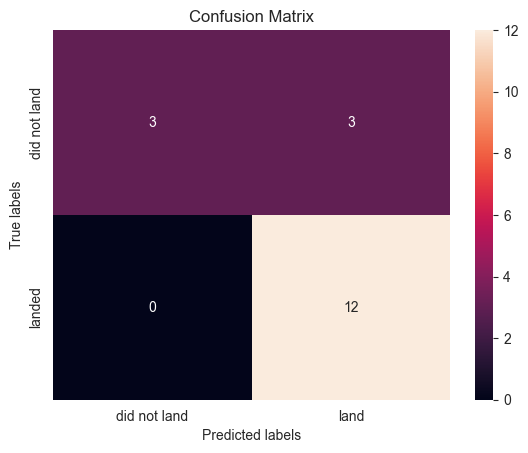

In [31]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


| Modelo                           | Mejor parámetro (GridSearchCV)                                                                                                           | Accuracy validación | Accuracy test | Comentarios                                             |
| -------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- | ------------------- | ------------- | ------------------------------------------------------- |
| **Logistic Regression**          | {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}                                                                                          | 0.8464              | 0.8333        | Problema principal: **false positives**                 |
| **Support Vector Machine (SVM)** | {'C': 1.0, 'gamma': 0.0316, 'kernel': 'sigmoid'}                                                                                         | 0.8482              | 0.8333        | Muy similar a Logistic Regression                       |
| **Decision Tree**                | {'criterion': 'gini', 'max\_depth': 6, 'max\_features': 'sqrt', 'min\_samples\_leaf': 4, 'min\_samples\_split': 2, 'splitter': 'random'} | 0.8893              | 0.8333        | Mejor accuracy en validación, pero test igual que otros |
| **K Nearest Neighbors (KNN)**    | {'algorithm': 'auto', 'n\_neighbors': 10, 'p': 1}                                                                                        | 0.8482              | 0.8333        | Igual que SVM en test                                   |


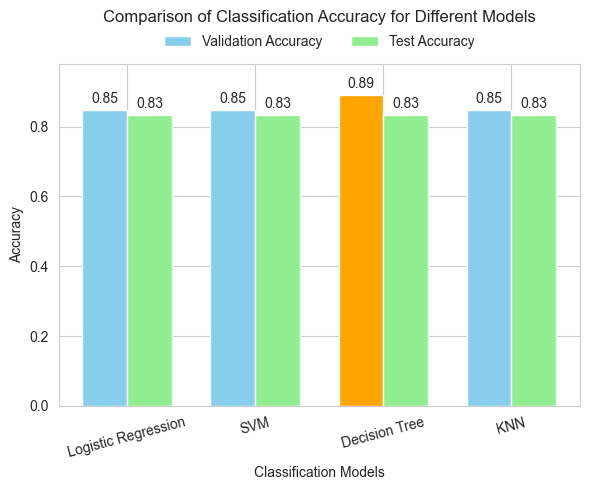

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']

# Accuracy en validación y test
validation_accuracy = [0.8464, 0.8482, 0.8893, 0.8482]
test_accuracy = [0.8333, 0.8333, 0.8333, 0.8333]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(6,5))

# Fondo transparente
fig.patch.set_alpha(0)
ax.set_facecolor('none')

# Colores: resaltar Decision Tree en validation
colors_val = ['skyblue', 'skyblue', 'orange', 'skyblue']

bars1 = ax.bar(x - width/2, validation_accuracy, width, label='Validation Accuracy', color=colors_val)
bars2 = ax.bar(x + width/2, test_accuracy, width, label='Test Accuracy', color='lightgreen')

# Etiquetas y título
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classification Models')
ax.set_title('Comparison of Classification Accuracy for Different Models', pad=30)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)

# Ajustar el eje y para espacio sobre las barras
ax.set_ylim(0, 0.98)

# Mostrar valores sobre las barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

# Leyenda debajo del título
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2, frameon=False)

plt.tight_layout()
plt.show()


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
